In [1]:
from GlucoCheck.glucoCheck import glucoCheckOps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
glucoCheckObject = glucoCheckOps()

Using TensorFlow backend.


In [2]:
data = glucoCheckObject.hallData
data['Display Time'] = pd.to_datetime(data['Display Time']) # Ensures that displayTime column 
# is converted to datetime format.
data['GlucoseValue'] = pd.to_numeric(data['GlucoseValue'])# Ensures that gluvoseValue is numeric
data.head() # this allows you to peek at loaded data; or type just data to see first and last portion of your dataset

,subjectId,Display Time,GlucoseValue
0,1636-69-001,2014-02-03 03:42:00,93
1,1636-69-001,2014-02-03 03:47:00,93
2,1636-69-001,2014-02-03 03:52:00,93
3,1636-69-001,2014-02-03 03:57:00,95
4,1636-69-001,2014-02-03 04:02:00,96


In [3]:
QC_table = glucoCheckObject.dataDescribe(data)
QC_table.head()

,Subject ID,Start,End,# of readings,# of days,Timestamp days,# of missing values,% of missing values,Avg gap size,Max gv,Min gv,Mean gv
0,2133-041,2017-07-03 18:32:00,2017-07-11 20:41:00,1858,8.08,8 days 02:04:00,490,21.04,28.82,204,51,108.56
1,2133-040,2017-06-28 13:34:00,2017-07-05 00:19:00,1792,6.42,6 days 10:40:00,100,5.39,2.94,171,59,92.59
2,2133-039,2017-06-05 12:23:00,2017-06-14 13:57:00,2013,9.04,9 days 01:29:00,733,28.09,5.51,204,50,103.92
3,2133-037,2017-06-05 14:11:00,2017-06-11 21:50:00,1785,6.29,6 days 07:34:00,57,3.13,2.71,153,48,92.97
4,2133-036,2017-06-01 15:26:00,2017-06-10 06:31:00,1954,8.62,8 days 15:00:00,651,26.21,5.47,214,58,107.53


In [4]:
# LSTM Imputation
dataWithMissing = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_LSTM.csv')
LSTM_imputed = glucoCheckObject.impute(dataWithMissing)

Gap < 50; We use LSTM imputations
Training Model...

Model trained successfully!
Imputation Successful


In [5]:
# Linear Imputation
dataWithMissing = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_LINEAR.csv')
Linear_imputed = glucoCheckObject.impute(dataWithMissing)

Gap < 5; We use the linear imputations
Imputation Successful


In [6]:
# Spline Imputation
dataWithMissing = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_SPLINE.csv')
Spline_imputed = glucoCheckObject.impute(dataWithMissing)

Gap < 15; We use the spline imputations
Imputation Successful


In [7]:
LSTM_Original = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_LSTM.csv')
Linear_Original = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_LINEAR.csv')
Spline_Original = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_SPLINE.csv')


## TRACE PLOTS

In [8]:
# FOR LSTM

In [9]:
df = pd.DataFrame()
df['Time'] = LSTM_Original['Display Time']
df['Time'] = df['Time'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%y %H:%M'))
df['Original'] = LSTM_Original['GlucoseValue']
df['LSTM'] = LSTM_imputed['GlucoseValue']
df = df.set_index(['Time'], drop=True)
O = df.Original
A = df.Original.ewm(alpha=0.05, adjust=False, ignore_na=True).mean()
A[O.isnull()] = np.nan
A = A.round()
df['Smooth'] = A

Text(0, 0.5, 'Glucose Value')

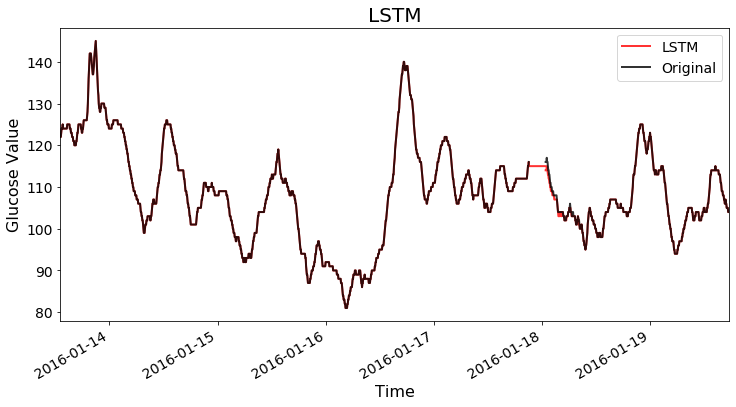

In [10]:
colors = ['red', 'black']


df[['LSTM','Smooth']].plot(color=colors, linewidth=2, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['LSTM','Original'], fontsize=14)

# title and labels
plt.title('LSTM', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Glucose Value', fontsize=16)

In [11]:
# FOR LINEAR

In [12]:
df = pd.DataFrame()
df['Time'] = Linear_Original['Display Time']
df['Time'] = df['Time'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%y %H:%M'))
df['Original'] = Linear_Original['GlucoseValue']
df['Linear'] = Linear_imputed['GlucoseValue']
df = df.set_index(['Time'], drop=True)

Text(0, 0.5, 'Glucose Value')

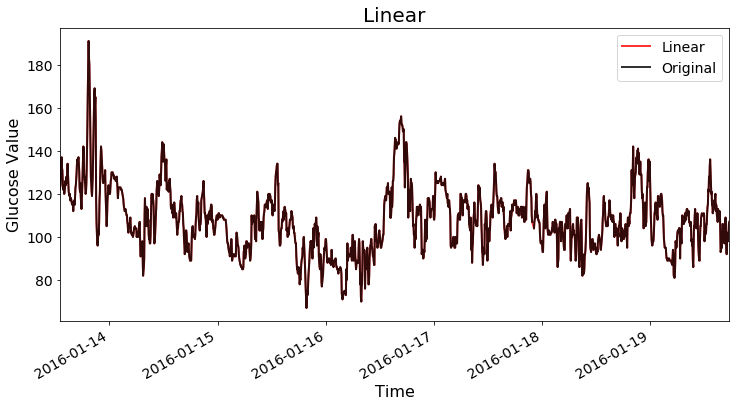

In [13]:
colors = ['red', 'black']


df[['Linear','Original']].plot(color=colors, linewidth=2, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Linear','Original'], fontsize=14)

# title and labels
plt.title('Linear', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Glucose Value', fontsize=16)

In [14]:
# FOR SPLINE

In [15]:
df = pd.DataFrame()
df['Time'] = Spline_Original['Display Time']
df['Time'] = df['Time'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%y %H:%M'))
df['Original'] = Spline_Original['GlucoseValue']
df['Spline'] = Spline_imputed['GlucoseValue']
df = df.set_index(['Time'], drop=True)

Text(0, 0.5, 'Glucose Value')

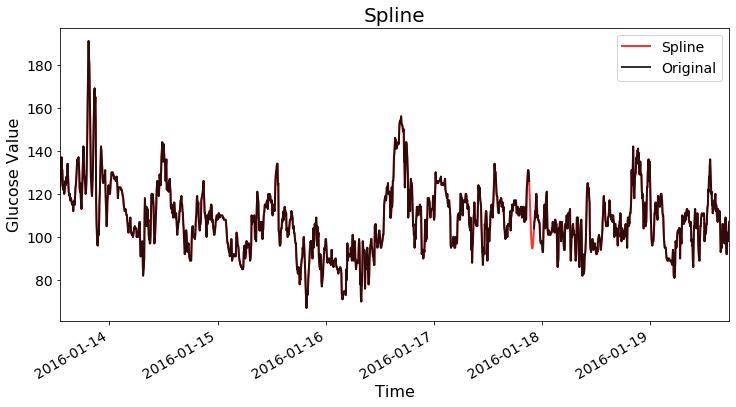

In [16]:
colors = ['red', 'black']


df[['Spline','Original']].plot(color=colors, linewidth=2, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Spline','Original'], fontsize=14)

# title and labels
plt.title('Spline', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Glucose Value', fontsize=16)

## HISTOGRAMS

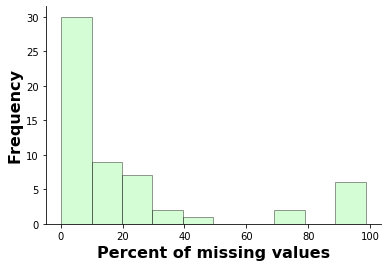

In [17]:
glucoCheckObject.histograms(QC_table, '% of missing values',1)

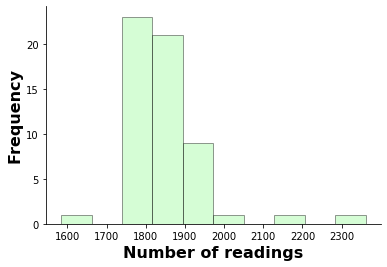

In [18]:
# of readings
glucoCheckObject.histograms(QC_table, '# of readings',1)

## Trace Plot


Displaying for all days 


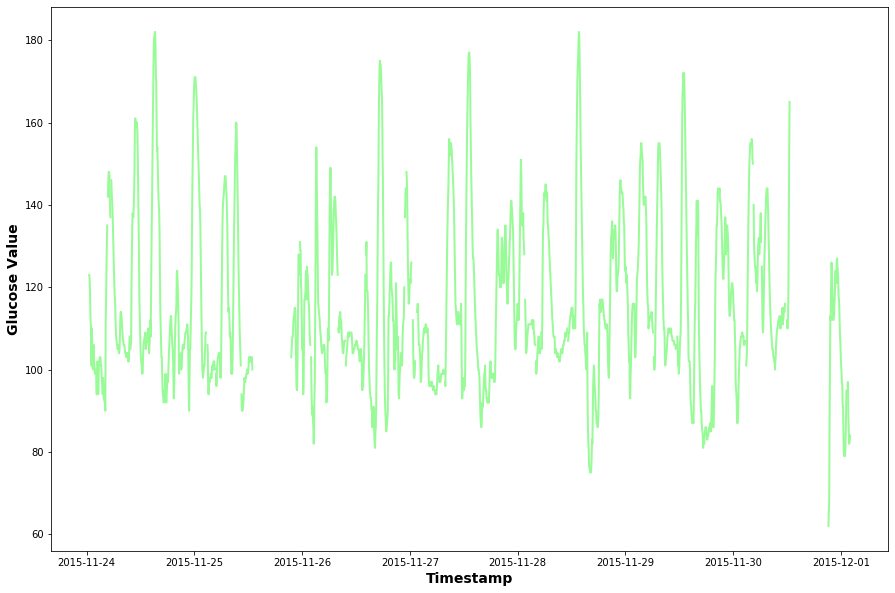

In [19]:
glucoCheckObject.plotIndividual('1636-69-026',data)

Displaying for day: 2015-11-27


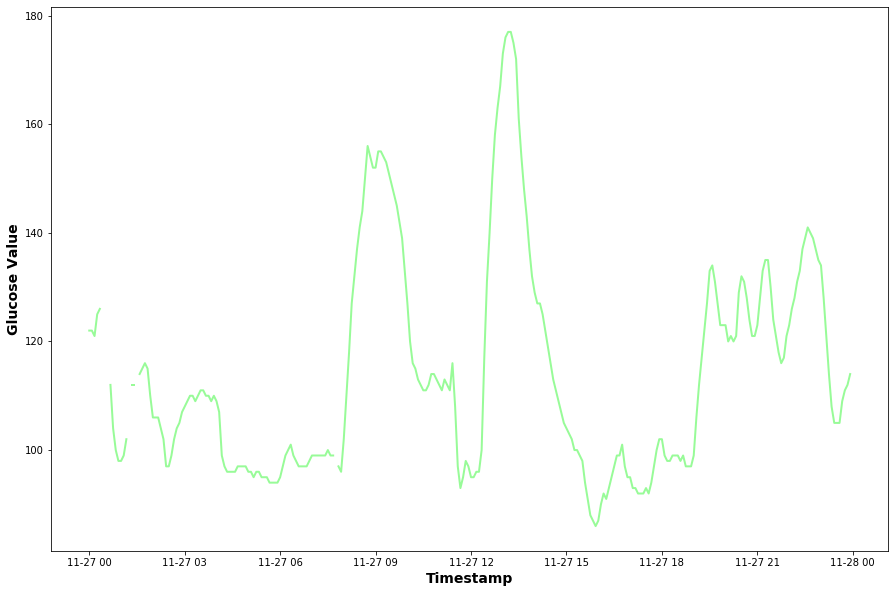

In [20]:
glucoCheckObject.plotIndividual('1636-69-026', data, '2015-11-27')

## Confusion Matrix

Confusion Matrix:



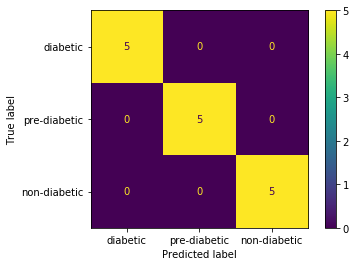

In [21]:
label = glucoCheckObject.classifier(LSTM_imputed)